# Experiment runner


For callibration run uncomment `compensation method 1 sphere` and `compensation method measurement 1 tube`

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


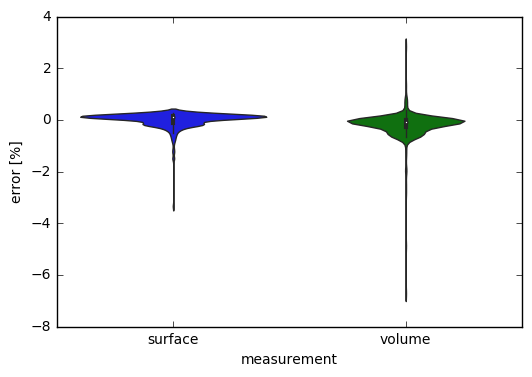

ERROR:root:File `u'paramtools.ipynb.py'` not found.


0/824
Populating the interactive namespace from numpy and matplotlib
/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']
5 20.0 101 inscribed
5 20.0 101 cylinder surface
5 20.0 101 cylinder volume
5 20.0 101 cylinder volume + sphere error
5 20.0 101 cylinder surface + sphere error
5 20.0 102 inscribed
5 20.0 102 cylinder surface
5 20.0 102 cylinder volume
5 20.0 102 cylinder volume + sphere error
5 20.0 102 cylinder surface + sphere error
5 20.0 103 inscribed
5 20.0 103 cylinder surface
5 20.0 103 cylinder volume
5 20.0 103 cylinder volume + sphere error
5 20.0 103 cylinder surface + sphere error
5 20.0 104 inscribed
5 20.0 104 cylinder surface
5 20.0 104 cylinder volume
5 20.0 104 cylinder volume + sphere error
5 20.0 104 cylinder surface + sphere error
5 20.0 105 inscribed
5 20.0 105 cylinder surface
5 20.0 105 cylinder volume
5 20.0 105 cylinder volume + sphere error
5 20.0 105 cylinder surface + sphere error
6 20.0 101 inscribed
6 20.0 101 cylinder surface
6 20.0 1

In [3]:
%run evaltools.ipynb
%run experiments_params.ipynb

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns
import sys
pth = op.abspath("../")
print pth
sys.path.insert(0, pth)
import teigen
import itertools
reload(teigen)
print teigen.__path__
import teigen.tb_vtk
reload (teigen.tb_vtk)

/Users/mjirik/projects/teigen
['/Users/mjirik/projects/teigen/teigen']


<module 'teigen.tb_vtk' from '/Users/mjirik/projects/teigen/teigen/tb_vtk.pyc'>

In [7]:
run_list = [
    #"compensation method 1 sphere", # callibration 
    #"compensation method measurement 1 tube",  # callibration
    
    ### --- evaluation ----
    # "compensation method",
    # "compensation method 10 spheres",
    # "compensation method 3 spheres various radius",
    # "compensation method 1 tube",  # looks good
    # "compensation method N tube",  # looks good
    # "compensation method 1 tube various radius", # fine
    # "compensation method 1 tube various length",# ok
    # "compensation method 1 tube mix", # works
    # "compensation method 1 cylinder",
    # "resolution tube"
    # "compensation method 5 tubes", # looks good
    # "mix"
    # "best test", 
    # "fixed resolution"
    #"generated volume element_number", # asi ok
    #
    # "mix 2", # test quality of compensation
    # "short",
    #"element number", # run in the morning
    #
    # == paper experiments
    "generated volume resolution_mm", # done
    "generated volume isotropy", # one half
    "generated volume radius", # asi ok
    #"generated volume length",  # do pulky
    #"generated volume element_number anisotropic", # asi ok
    #"generated volume noise", 
]

In [8]:
tg = teigen.tgmain.Teigen()
config = tg.get_default_config()

In [9]:
# pp(config)
config

OrderedDict([('generators',
              OrderedDict([('Voronoi tubes',
                            OrderedDict([('element_number', 30),
                                         ('radius_distribution_uniform', True),
                                         ('radius_distribution_normal', False),
                                         ('radius_distribution_fixed', False),
                                         ('radius_distribution_minimum', 2.0),
                                         ('radius_distribution_maximum', 10.0),
                                         ('radius_distribution_mean', 5.0),
                                         ('radius_distribution_standard_deviation',
                                          5.0),
                                         ('random_generator_seed', 0)])),
                           ('Gensei', OrderedDict([('n_objects', 10)])),
                           ('Continuous tubes',
                            OrderedDict([('element_number', 3

# Prepare multiple configs


In [11]:
configs = []
tg = teigen.tgmain.Teigen()

In [12]:
run_label = "short"
if run_label in run_list:
    for length in [10]:
        for rnd in [101, 102, 103]:
            config = tg.get_default_config()
            config["generator_id"] = 3
            config["output"]["note"] = run_label
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = 3
            gc["orientation_anisotropic"] = False
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = 0.1
            gc["random_generator_seed"] = rnd
            config["postprocessing"]["measurement_resolution"] = 21
            config["appearance"]["skip_volume_generation"] = True
            configs.append(config)

In [13]:
run_label = "tube length"
if run_label in run_list:
    for length in [5, 6, 7, 8, 10, 12, 14, 16, 20, 24, 28, 32, 40, 48]:
        for rnd in [101, 102, 103]:
            config = tg.get_default_config()
            config["generator_id"] = 3
            config["output"]["note"] = run_label
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = 10
            gc["orientation_anisotropic"] = False
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = 0.1
            gc["random_generator_seed"] = rnd
            config["postprocessing"]["measurement_resolution"] = 20
            config["appearance"]["skip_volume_generation"] = True
            configs.append(config)

In [14]:
run_label = "tube length 2"
if run_label in run_list:
    for length in [5, 10, 15, 20, 25, 30, 35, 40, 45]:
        for rnd in [101, 102, 103]:
            config = tg.get_default_config()
            config["generator_id"] = 3
            config["output"]["note"] = run_label
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = 10
            gc["orientation_anisotropic"] = False
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = 0.1
            gc["random_generator_seed"] = rnd
            config["postprocessing"]["measurement_resolution"] = 20
            config["appearance"]["skip_volume_generation"] = True
            configs.append(config)

# Vepsaná, opsaná, 

In [15]:
run_label = "compensation method"
if run_label in run_list:
    for resolution in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
        for rnd in [101]:
            for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = 10
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_uniform"] = False
                gc["radius_distribution_fixed"] = True
                gc["radius_distribution_normal"] = False
                gc["radius_distribution_mean"] = 20
                gc["radius_distribution_standard_deviation"] = 0.1
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = 20
                gc["length_distribution_standard_deviation"] = 0.1
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

### 1 sphere

In [16]:
run_label = "compensation method 1 sphere"
if run_label in run_list:
    resolutions = [
        5,
        6,
        7,
        8, 
        10, 
        12, 14,
        17,
        19,
        21, 23, 29, 
        31,
        34, 36,
        39,
        42, 44,
        46,
        48,
        50, 53, 58, 60,
        63, 67,
        70,
        73, 78,
        80, 84, 87, 
        90,
        95
        #100, 150
    ]
    radiuses = [20.]
    rnds = [101, 102, 103, 104, 105]
    radius_methods = [
                "inscribed", 
                #"circumscribed", 
                "cylinder surface", 
                "cylinder volume", 
                #"average", 
                "cylinder volume + sphere error",
                "cylinder surface + sphere error",
        
    ]
    for resolution, radius, rnd, radius_method in itertools.product(
        resolutions, radiuses, rnds, radius_methods):
        
    # for resolution in [6, 7, 8, 10, 12, 16, 18, 20, 22, 24, 26, 28, 30, 34, 38, 42, 46, 50]:
    #for resolution in 
    #    for rnd in [101, 102]:
    #        for radius_method in [
    #        ]:
    
        print("{} {} {} {}".format(resolution, radius, rnd, radius_method))
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = 1
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 30.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = 0.0
        gc["length_distribution_standard_deviation"] = 0.1
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        configs.append(config)

### 10 spheres

In [17]:
run_label = "compensation method 10 spheres"
if run_label in run_list:
    for resolution in [6, 10, 17, 25, 35, 50]:
        for rnd in [101]:
            for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = 10
                gc["radius_distribution_uniform"] = False
                gc["radius_distribution_fixed"] = True
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = 20
                gc["radius_distribution_standard_deviation"] = 0.1
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = 0.0
                gc["length_distribution_standard_deviation"] = 0.1
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

### 3 spheres various radius

In [18]:
run_label = "compensation method 3 spheres various radius"
import itertools
if run_label in run_list:
    resolutions = [25]
    for resolution, radius, rnd, radius_method in itertools.product(
        [25],
        [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50],
        [102, 103],
        ["inscribed", "cylinder surface", "cylinder volume", "cylinder volume + sphere error"]
    ):
    # for resolution in [25]:
    #     for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    #         for rnd in [102, 103]:
    #             for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = 3
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 30.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = 0.0
        gc["length_distribution_standard_deviation"] = 0.1
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        configs.append(config)

## 1 cylinder

In [19]:
run_label = "compensation method 1 cylinder"
import itertools
if run_label in run_list:
    resolutions = [25]
    for resolution, radius, rnd, radius_method in itertools.product(
        [10, 15, 20, 25, 35, 50],
        [10, 15],
        [102, 103],
        ["inscribed", "cylinder volume", "cylinder surface" , 
         "cylinder volume + sphere error", "cylinder surface + sphere error"]
    ):
    # for resolution in [25]:
    #     for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    #         for rnd in [102, 103]:
    #             for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = 3
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 30.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = 20.0
        gc["length_distribution_standard_deviation"] = 0.1
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        config["measurement"]["tube_shape"] = False
        configs.append(config)

## 1 tube - measurement

In [20]:
run_label = "compensation method measurement 1 tube"
import itertools
if run_label in run_list:
    # resolutions = [6, 10, 16, 22, 26, 30, 38, 46, 50]
    resolutions = [
        5,  7, 9, 11, 13, 
        # 6,  8, 10, 12, 16, 20, # even numbers 
        15, 19, 23, 
        25, 27, 29, 33, 35, 37, 41, 43, 45, 51,
        55, 57, 61, 65, 67, 
        69, 73, 77, 81, 85, 87, 
        91, 95
    ]
    radiuses = [20.]
    rnds = [111, 112, 113, 114]
    lengths = [30.]
    radius_methods = [
                "inscribed", 
                # "cylinder volume + sphere compensation",
                "cylinder surface + sphere error",
                # "cylinder surface + sphere error + join error",
                "cylinder volume + sphere error",
                # "cylinder volume + sphere error + join error"
        
    ]
    for resolution, radius, rnd, radius_method, length in itertools.product(
        resolutions, radiuses, rnds, radius_methods, lengths):
    # for resolution in [25]:
    #     for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    #         for rnd in [102, 103]:
    #             for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
    
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = 1
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 30.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = length
        gc["length_distribution_standard_deviation"] = 0.1
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        config["measurement"]["tube_shape"] = True
        configs.append(config)

## 1 Tube evaluation

In [21]:
run_label = "compensation method 1 tube"
import itertools
if run_label in run_list:
    # resolutions = [6, 10, 16, 22, 26, 30, 38, 46, 50]
    resolutions = [
        
        21, 25, # 27, 
        33, 35, #37, 39, 
        41, 47, 
        51, 55, #59, 
        65
    ]
    radiuses = [20.]
    rnds = [
        # 111, # work fine
        11, 12, 13]
    lengths = [20., 30., 40.]
    radius_methods = [
                "inscribed", 
                #"circumscribed", 
                # "cylinder surface", 
                #"cylinder volume", 
                #"average", 
                "cylinder volume + sphere error",
                "cylinder surface + sphere error",
                "cylinder surface + sphere error + join error",
                "cylinder volume + sphere error + join error",
        
    ]
    for resolution, radius, rnd, radius_method, length in itertools.product(
        resolutions, radiuses, rnds, radius_methods, lengths):
    # for resolution in [25]:
    #     for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    #         for rnd in [102, 103]:
    #             for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
    
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = 1
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 30.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = length
        gc["length_distribution_standard_deviation"] = 0.1
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        config["measurement"]["tube_shape"] = True
        configs.append(config)

In [22]:
run_label = "compensation method N tube"
import itertools
if run_label in run_list:
    # resolutions = [6, 10, 16, 22, 26, 30, 38, 46, 50]
    resolutions = [
        #21, 22, 25, 27, 33, 35, 37, 
        39, 41, 45, 51, 55, 59, 65]
    radiuses = [20.]
    rnds = [
        # 111, # work fine
        11, 12]
    element_numbers = [2, 5]
    lengths = [10., 30., 50.]
    radius_methods = [
                # "inscribed", 
                #"circumscribed", 
                # "cylinder surface", 
                #"cylinder volume", 
                #"average", 
                "cylinder volume + sphere error",
                "cylinder surface + sphere error",
                "cylinder surface + sphere error + join error"
        
    ]
    for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
        resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):
    # for resolution in [25]:
    #     for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    #         for rnd in [102, 103]:
    #             for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
    
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = element_number
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 40.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = length
        gc["length_distribution_standard_deviation"] = 0.1
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        config["measurement"]["tube_shape"] = True
        configs.append(config)

In [23]:
run_label = "compensation method 1 tube problem"
if run_label in run_list:
    for resolution in [6, 7, 8, 10, 12, 16, 20, 25, 30, 35, 40, 45, 50]:
        for rnd in [101]:
            for radius_method in [
                #"cylinder surface", 
                #"cylinder volume", 
                "cylinder volume + sphere error"
            ]:
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = 1
                gc["radius_distribution_uniform"] = False
                gc["radius_distribution_fixed"] = True
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = 20
                gc["radius_distribution_standard_deviation"] = 0.1
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = 20.0
                gc["length_distribution_standard_deviation"] = 0.1
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

## 1 tube various radius

In [24]:
run_label = "compensation method 1 tube various radius"
if run_label in run_list:
    # for resolution in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    for resolution in [25]:
        for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
            for rnd in [101, 102]:
                for radius_method in [
                    "inscribed",
                    "cylinder surface", 
                    "cylinder volume", 
                    "cylinder volume + sphere error"
                ]:
                    config = tg.get_default_config()
                    config["generator_id"] = 3
                    config["output"]["note"] = run_label + " " + radius_method
                    gc = config["generators"]["Unconnected tubes"]
                    gc["element_number"] = 1
                    gc["radius_distribution_uniform"] = False
                    gc["radius_distribution_fixed"] = True
                    gc["orientation_anisotropic"] = False
                    gc["radius_distribution_mean"] = radius
                    gc["radius_distribution_standard_deviation"] = 0.1
                    gc["radius_distribution_maximum"] = 60.0
                    gc["radius_distribution_minimum"] = 3.0
                    gc["length_distribution_mean"] = 20.0
                    gc["length_distribution_standard_deviation"] = 0.1
                    gc["random_generator_seed"] = rnd
                    config["postprocessing"]["measurement_resolution"] = resolution
                    config["appearance"]["skip_volume_generation"] = True
                    config["measurement"]["polygon_radius_selection_method"] = radius_method
                    configs.append(config)

## 1 tube various length

In [25]:
run_label = "compensation method 1 tube various length"
if run_label in run_list:
    # for resolution in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    for resolution in [25]:
        for length in [20, 30, 40, 45, 50, 55, 60]:
            for rnd in [101, 102]:
                for radius_method in [
                    #"cylinder surface", "cylinder volume", 
                    #"cylinder volume + sphere error",
                    "best"
                ]:
                    config = tg.get_default_config()
                    config["generator_id"] = 3
                    config["output"]["note"] = run_label + " " + radius_method
                    gc = config["generators"]["Unconnected tubes"]
                    gc["element_number"] = 1
                    gc["radius_distribution_uniform"] = False
                    gc["radius_distribution_fixed"] = True
                    gc["orientation_anisotropic"] = False
                    gc["radius_distribution_mean"] = 10.0
                    gc["radius_distribution_standard_deviation"] = 0.1
                    gc["radius_distribution_maximum"] = 60.0
                    gc["radius_distribution_minimum"] = 3.0
                    gc["length_distribution_mean"] = length
                    gc["length_distribution_standard_deviation"] = 0.1
                    gc["random_generator_seed"] = rnd
                    config["postprocessing"]["measurement_resolution"] = resolution
                    config["appearance"]["skip_volume_generation"] = True
                    config["measurement"]["polygon_radius_selection_method"] = radius_method
                    configs.append(config)

In [26]:
# 1 tube mix

In [27]:
run_label = "compensation method 1 tube mix"
import itertools
if run_label in run_list:
    resolutions = [25]
    for resolution, radius, length, rnd, radius_method in itertools.product(
        [25, 35],
        [10, 15],
        [30, 40, 50],
        [102, 103, 104, 105],
        [
            #"inscribed", "cylinder volume", "cylinder surface" , 
         "cylinder volume + sphere error", "cylinder surface + sphere error", "best"]
    ):
    # for resolution in [25]:
    #     for radius in [6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 50]:
    #         for rnd in [102, 103]:
    #             for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average"]:
        config = tg.get_default_config()
        config["generator_id"] = 3
        config["output"]["note"] = run_label + " " + radius_method
        gc = config["generators"]["Unconnected tubes"]
        gc["element_number"] = 1
        gc["radius_distribution_uniform"] = False
        gc["radius_distribution_fixed"] = True
        gc["orientation_anisotropic"] = False
        gc["radius_distribution_mean"] = radius
        gc["radius_distribution_standard_deviation"] = 0.1
        gc["radius_distribution_maximum"] = 30.0
        gc["radius_distribution_minimum"] = 3.0
        gc["length_distribution_mean"] = length
        gc["length_distribution_standard_deviation"] = 1.0
        gc["random_generator_seed"] = rnd
        config["postprocessing"]["measurement_resolution"] = resolution
        config["appearance"]["skip_volume_generation"] = True
        config["measurement"]["polygon_radius_selection_method"] = radius_method
        config["measurement"]["tube_shape"] = True
        configs.append(config)

# Všehochuť

## 5 tubes

In [28]:
run_label = "compensation method 5 tubes"
if run_label in run_list:
    resolutions = [
        # 26, 31, 33, 39, 
        41, 45, 59]
    radiuses = [20., 30.]
    rnds = [110]
    lengths = [10, 30, 50]
    radius_methods = [
                # "inscribed", 
                #"circumscribed", 
                #"cylinder surface", 
                #"cylinder volume", 
                #"average", 
                "cylinder volume + sphere error",
                "cylinder surface + sphere error",
                "cylinder surface + sphere error + join error"
        
    ]
    for resolution, radius, rnd, radius_method, length in itertools.product(
        resolutions, radiuses, rnds, radius_methods, lengths):
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = 5
                gc["radius_distribution_uniform"] = True
                gc["radius_distribution_fixed"] = False
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = radius
                gc["radius_distribution_standard_deviation"] = 2.0
                gc["radius_distribution_maximum"] = 40.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = length
                gc["length_distribution_standard_deviation"] = 2.0
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

In [29]:
# run_label = "resolution shape"
# if run_label in run_list:
#     for resolution in [5, 6, 7, 8, 10, 12, 14, 16, 20, 24, 28, 32, 40, 48]:
#         for rnd in [101, 102, 103, 104, 105]:
#             config = tg.get_default_config()
#             config["generator_id"] = 3
#             config["output"]["note"] = run_label
#             gc = config["generators"]["Unconnected tubes"]
#             gc["element_number"] = 10
#             gc["orientation_anisotropic"] = False
#             gc["length_distribution_mean"] = 0.0
#             gc["length_distribution_standard_deviation"] = 0.0
#             gc["random_generator_seed"] = rnd
#             config["postprocessing"]["measurement_resolution"] = resolution
#             config["appearance"]["skip_volume_generation"] = True
#             configs.append(config)

run_label = "resolution tube"
if run_label in run_list:
    for resolution in [6, 7, 9, 11, 13, 15, 19, 23, 28, 33, 39, 50]:
        for rnd in [102, 103]:
            config = tg.get_default_config()
            config["generator_id"] = 3
            config["output"]["note"] = run_label
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = 10
            gc["orientation_anisotropic"] = False
            gc["length_distribution_mean"] = 40.0
            gc["length_distribution_standard_deviation"] = 2.0
            gc["random_generator_seed"] = rnd
            config["postprocessing"]["measurement_resolution"] = resolution
            config["appearance"]["skip_volume_generation"] = True
            config["measurement"]["polygon_radius_selection_method"] = "cylinder volume + sphere error"
            configs.append(config)

In [30]:
run_label = "mix"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47, 
        45, 53, 57]
    element_numbers = [10, 15]
    radiuses = [15., 20.]
    rnds = [#110,
            112]
    lengths = [28, 30, 32]
    radius_methods = [
                #"cylinder surface + sphere error",
                "cylinder volume + sphere error",
                # "cylinder volume + sphere error + man", # fine
                # "cylinder surface + sphere error + join error", # fine
                # "cylinder surface + sphere error + join error man" # fine
        
    ]
    for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
        resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = element_number
                gc["radius_distribution_uniform"] = True
                gc["radius_distribution_fixed"] = False
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = radius
                gc["radius_distribution_standard_deviation"] = 0.1
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = length
                gc["length_distribution_standard_deviation"] = 10.0
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

In [31]:
run_label = "mix 2"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        
        45, 
        # 51, ok kromě cylinder surface + sphere error
        53, 
        55]
    element_numbers = [10]
    radiuses = [15., 20.]
    rnds = [110,
            
            112,
            113,
           ]
    lengths = [28, 30, 32]
    radius_methods = [
                # "inscribed",
                "cylinder surface + sphere error",
                "cylinder volume + sphere error",
                "cylinder surface + sphere error + join error", # fine
                "cylinder volume + sphere error + join error", # fine
                # "cylinder volume + sphere error + man", # fine
                # "cylinder surface + sphere error + join error man" # fine
        
    ]
    for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
        resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):
                config = tg.get_default_config()
                config["generator_id"] = "Unconnected tubes"
                config["output"]["note"] = run_label + " " + radius_method
                config["areasampling"]["voxelsize_mm"] = [1.0, 1.0, 1.0]
                config["areasampling"]["areasize_mm"] = [100.0, 100.0, 100.0]
                config["areasampling"]["areasize_px"] = [100, 100, 100]
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = element_number
                gc["radius_distribution_uniform"] = True
                gc["radius_distribution_fixed"] = False
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = radius
                gc["radius_distribution_standard_deviation"] = 0.1
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = length
                gc["length_distribution_standard_deviation"] = 10.0
                gc["random_generator_seed"] = rnd
                gc['radius_distribution_uniform'] = False
                gc['radius_distribution_normal'] = True
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

## Best

In [32]:
run_label = "best test"
if run_label in run_list:
    for resolution in [25, 30, 35]:
        for rnd in [106, 107, 108, 109, 110]:
            for radius_method in ["best"]:
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = 1
                gc["radius_distribution_uniform"] = True
                gc["radius_distribution_fixed"] = False
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = 10
                gc["radius_distribution_standard_deviation"] = 2.0
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = 30.0
                gc["length_distribution_standard_deviation"] = 10.0
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

In [33]:
run_label = "fixed resolution"
if run_label in run_list:
    for resolution in [25]:
        for rnd in [106, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119]:
            for radius_method in [
                # "inscribed", 
                # "average",
                #"cylinder volume + sphere error", 
                #"cylinder surface + sphere error", 
                "best", 
            ]:
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = 5
                gc["radius_distribution_uniform"] = True
                gc["radius_distribution_fixed"] = False
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = 10
                gc["radius_distribution_standard_deviation"] = 2.0
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = 30.0
                gc["length_distribution_standard_deviation"] = 2.0
                gc["random_generator_seed"] = rnd
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                configs.append(config)

# paper data

In [34]:
## Paper figures
def get_paper_config(resolution_mm=0.02):
    config = tg.get_default_config()
    config["generator_id"] = 3
    #config["output"]["note"] = run_label + " " + radius_method
    gc = config["generators"]["Unconnected tubes"]
    gc["element_number"] = 30
    gc["radius_distribution_uniform"] = True
    gc["radius_distribution_fixed"] = False
    gc["orientation_anisotropic"] = False
    gc["radius_distribution_mean"] = 0.2
    gc["radius_distribution_standard_deviation"] = 0.1
    gc["radius_distribution_maximum"] = 3.0
    gc["radius_distribution_minimum"] = .3
    gc['radius_distribution_uniform'] = False
    gc['radius_distribution_normal'] = True
    gc["length_distribution_mean"] = 3.0
    gc["length_distribution_standard_deviation"] = .1
    gc["volume_fraction"] = 0.5
    gc["random_generator_seed"] = 100
    gc["orientation_anisotropic"] = False
    config["postprocessing"]["gaussian_blur"] = True
    config["postprocessing"]["gaussian_filter_sigma_mm"] = 0.04
    config["postprocessing"]["measurement_resolution"] = 35
    config["postprocessing"]['add_noise'] = False
    config["appearance"]["skip_volume_generation"] = False
    config["measurement"]["polygon_radius_selection_method"] = "inscribed"
    config['areasampling']["areasize_mm"] = [10.0, 10.0, 10.0]
    config['areasampling']["areasize_px"] = [10.0/resolution_mm, 10.0/resolution_mm, 10.0/resolution_mm]
    config['areasampling']["voxelsize_mm"] = [resolution_mm, resolution_mm, resolution_mm]
    # config['filepattern'] = "~/teigen_data/generated_resolution_mm_{seriesn:03d}/data{:06d}.jpg"
    return config

In [35]:
# bez šumu
run_label = "generated volume resolution_mm"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [.5, .4, .3, .2, 0.1, 0.08, 0.06, 0.04, 0.02, .01]
    element_numbers = [30]
    radiuses = [.2]
    rnds = [
        110,
       # 111,
       # 112
    ]
    lengths = [3.0]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for resolution_mm, radius_method  in itertools.product(
        resolutions_mm, radius_methods):
                config = get_paper_config(resolution_mm=resolution_mm)
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                config['filepattern'] = "~/teigen_data/teigen_resolution_mm_" + str(resolution_mm) + "_{seriesn:03d}/data{:06d}.jpg"
                configs.append(config)

In [36]:
# bez šumu
run_label = "generated volume isotropy"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [
        #.5, .4, .3, .2, 0.1, 0.08, 0.06, 
        0.04, 0.02, .01]
                       #0.4, 0.2, .1
    isotropy_values = [
        5, 4, 3, 2, 1, 0.8, 0.6, 0.3, 0.2, .1
    ]
    element_numbers = [30]
    radiuses = [.2]
    rnds = [
        110,
       # 111,
       # 112
    ]
    lengths = [3.0]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for isotropy, radius_method in itertools.product(
        isotropy_values, radius_methods):
                config = get_paper_config()
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                gc["orientation_anisotropic"] = True
                gc["orientation_variance_rad"] = isotropy
                config['filepattern'] = "~/teigen_data/teigen_isotropy_" + str(isotropy) + "_{seriesn:03d}/data{:06d}.jpg"
                configs.append(config)

In [37]:
run_label = "generated volume element_number"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [.2]
    element_numbers = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
    radiuses = [.5]
    rnds = [
        110,
       # 111,
       # 112
    ]
    lengths = [3.0]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for element_number, radius_method in itertools.product(
        element_numbers, radius_methods):
                config = get_paper_config()
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                gc["element_number"] = element_number
                config['filepattern'] = "~/teigen_data/teigen_element_number_" + str(element_number) + "_{seriesn:03d}/data{:06d}.jpg"
                configs.append(config)

In [38]:
run_label = "generated volume element_number anisotropic"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [.2]
    element_numbers = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
    radiuses = [.5]
    rnds = [
        110,
       # 111,
       # 112
    ]
    lengths = [3.0]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for element_number, radius_method in itertools.product(
        element_numbers, radius_methods):
                config = get_paper_config()
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                gc["element_number"] = element_number
                gc["orientation_anisotropic"] = True
                gc["maximum_1000_iteration_number"] = 30
                config['filepattern'] = "~/teigen_data/teigen_element_number_anisotropic_" + str(element_number) + "_{seriesn:03d}/data{:06d}.jpg"
                configs.append(config)

In [39]:
run_label = "generated volume radius"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [.02]
    
    element_numbers = [30]
    radiuses = [0.06, 0.08, 0.1, 0.2, .3, .5, .8, 1.0, 1.5, 3.0]
    rnds = [
        110,
       # 111,
       # 112
    ]
    lengths = [3.0]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for radius, radius_method in itertools.product(
        radiuses, radius_methods):
                config = get_paper_config()
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                gc["radius_distribution_mean"] = radius
                gc["radius_distribution_uniform"] = False
                gc["radius_distribution_fixed"] = True
                gc["radius_distribution_normal"] = False
                config['filepattern'] = "~/teigen_data/teigen_radius_" + str(radius) + "_{seriesn:03d}/data{:06d}.jpg"
                configs.append(config)

In [40]:
run_label = "generated volume length"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [.02]
    element_numbers = [30]
    radiuses = [0.2]
    rnds = [
        110,
       # 111,
       # 112
    ]
    lengths = [
        # 0.05, 0.1, 0.2, 
        0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 
        #5.0, 6.0
    ]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for radius_method, length in itertools.product(
        radius_methods, lengths):
                config = get_paper_config()
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                # gc["radius_distribution_mean"] = radius
                gc["length_distribution_mean"] = length
                config['filepattern'] = "~/teigen_data/teigen_length_" + str(length) + "_{seriesn:03d}/data{:06d}.jpg"
                configs.append(config)

In [41]:
run_label = "generated volume noise"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        # 15,
        # 25,
        35,
        # 45,
        # 55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    resolutions_mm = [.02]
    element_numbers = [30]
    radiuses = [.3, .5, .8, 1.1, 1.5]
    rnds = [
        #110,
        111,
        # 112
    ]
    noises = [20, 40, 60, 80, 100, 120, 140, 160, 200, 220]
    lengths = [3.0]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                # "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for noise, radius_method in itertools.product( noises, radius_methods):
                config = get_paper_config()
                gc = config["generators"]["Unconnected tubes"]
                config["output"]["note"] = run_label + " " + radius_method
                config['filepattern'] = "~/teigen_data/teigen_noise_" + str(noise) + "_{seriesn:03d}/data{:06d}.jpg"
                config["postprocessing"]['add_noise'] = True
                config["postprocessing"]['noise_exponent'] = 0.
                config["postprocessing"]['noise_std'] = noise
                config["postprocessing"]['noise_mean'] = 0.
                config["postprocessing"]['noise_lambda0'] = 0.02
                config["postprocessing"]['noise_lambda1'] = 1.00
                configs.append(config)

# Run multiple configs

In [42]:
run_label = "element number"
if run_label in run_list:
    # if run_label in run_list:
    # for resolution in [25, 30, 35]:
    #    for rnd in [106, 107, 108, 109, 110]:
    #        for radius_method in ["best"]:
    resolutions = [
        # 26, 31, 33, 39, 
        # 41, 45, 59, 
        # 47,
        15,
        25,
        35,
        # 45,
        55,
        # 65,
        
        # 51, ok kromě cylinder surface + sphere error
        #53, 
        #55
    ]
    element_numbers = [5, 15, 25, 35, 45, 55, 65]
    radiuses = [5.]
    rnds = [
        110,
        #111,
        #112
    ]
    lengths = [10]
    radius_methods = [
                "inscribed",
                # "cylinder surface + sphere error",
                "cylinder volume + sphere error",
                # "cylinder surface + sphere error + join error",
                # "cylinder volume + sphere error + join error", 
        
    ]
    for element_number, resolution, radius, radius_method, length, rnd  in itertools.product(
        element_numbers, resolutions, radiuses, radius_methods, lengths, rnds):
                config = tg.get_default_config()
                config["generator_id"] = 3
                config["output"]["note"] = run_label + " " + radius_method
                gc = config["generators"]["Unconnected tubes"]
                gc["element_number"] = element_number
                gc["radius_distribution_uniform"] = True
                gc["radius_distribution_fixed"] = False
                gc["orientation_anisotropic"] = False
                gc["radius_distribution_mean"] = radius
                gc["radius_distribution_standard_deviation"] = 0.1
                gc["radius_distribution_maximum"] = 30.0
                gc["radius_distribution_minimum"] = 3.0
                gc["length_distribution_mean"] = length
                gc["length_distribution_standard_deviation"] = 1.0
                gc["random_generator_seed"] = rnd
                gc["volume_fraction"] = 0.5
                config["postprocessing"]["measurement_resolution"] = resolution
                config["appearance"]["skip_volume_generation"] = True
                config["measurement"]["polygon_radius_selection_method"] = radius_method
                config['areasampling']["areasize_mm"] = [200.0, 200.0, 200.0]
                config['areasampling']["areasize_px"] = [200.0, 200.0, 200.0]
                configs.append(config)

In [43]:
#import psutil

#def print_number_of_opened_files():
#    for proc in psutil.process_iter():
#        print proc.open_files()

In [46]:
run_configs(configs)

0 / 30
generated volume resolution_mm inscribed
100 0.2 3.0 35
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
run finished
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333
progess: 0.0333333333333

/Users/mjirik/miniconda/lib/python2.7/site-packages/yaml/representer.py:142: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data in [None, ()]:


ZeroDivisionError: float division by zero